In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
  # Note: had to recopy the hawaii.sqlite from the resources folder to the current folder to get this to work
  # May have to do the same with other data files
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# EXTRA - Explore more 
Base.metadata.tables

FacadeDict({'measurement': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [9]:
from sqlalchemy import inspect

In [10]:
# EXTRA - Explore more - haven't run session + Session(engine) yet
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns2 = inspector.get_columns('station')
for column in columns2:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# See sample data
engine.execute('Select * FROM measurement LIMIT 10').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [15]:
# See sample data
engine.execute('Select * FROM station LIMIT 10').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# Find the most recent data in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f' The most recent date is {most_recent[0]}')
      

 The most recent date is 2017-08-23


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

past_precipitation = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc()).all() 


In [18]:
# Print out / retrieve the data and precipitation scores

for i in past_precipitation:
    print (i['date'], i['prcp'])

# Note - some precipitation fields have 0.0 and some have None

2017-08-23 0.0
2017-08-23 0.0
2017-08-23 0.08
2017-08-23 0.45
2017-08-22 0.0
2017-08-22 0.0
2017-08-22 0.5
2017-08-21 0.0
2017-08-21 0.02
2017-08-21 None
2017-08-21 0.56
2017-08-20 0.0
2017-08-20 0.01
2017-08-20 None
2017-08-19 0.0
2017-08-19 0.0
2017-08-19 None
2017-08-19 0.09
2017-08-18 0.0
2017-08-18 0.0
2017-08-18 0.06
2017-08-18 None
2017-08-17 0.0
2017-08-17 0.05
2017-08-17 0.01
2017-08-17 0.13
2017-08-16 0.0
2017-08-16 0.07
2017-08-16 0.12
2017-08-16 0.42
2017-08-15 0.02
2017-08-15 0.0
2017-08-15 0.06
2017-08-15 0.32
2017-08-15 0.42
2017-08-14 0.0
2017-08-14 0.01
2017-08-14 0.08
2017-08-14 0.0
2017-08-14 0.22
2017-08-13 0.0
2017-08-13 None
2017-08-13 0.0
2017-08-13 0.0
2017-08-13 None
2017-08-12 0.0
2017-08-12 0.0
2017-08-12 0.14
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 None
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.07
2017-08-09 0.0
2017-08-09 0.0
2017-08-09 0.15
2017-08-08 0.0
2017-08-08 0.1
2017-08-08 0.0
2017-08-08 0.34
2017-08-07 0.0
2017-08-0

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Working, but why is it coming out with 0 and 1 as column heads

year_precipitation_df = pd.DataFrame(past_precipitation)
year_precipitation_df.head()

,0,1
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [23]:
year_precipitation_df.columns = ["Date", "Rainfall"]
year_precipitation_df.head()

,Date,Rainfall
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [25]:
# Set the index to the date column

year_precipitation_df.set_index('Date') 
year_precipitation_df.head(20)


,Date,Rainfall
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

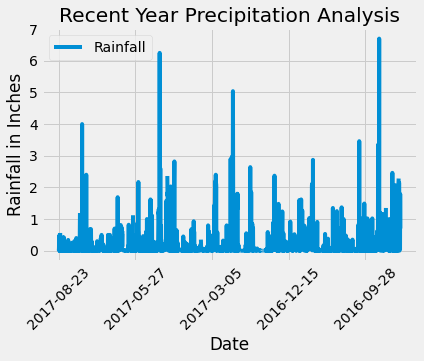

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data

year_precipitation_df.plot('Date', 'Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall in Inches')
plt.title("Recent Year Precipitation Analysis")
plt.xticks(rotation = 45)
plt.show

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data

year_precipitation_df.describe()

,Rainfall
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number stations in the dataset


total_stations = session.query(Station).count()
total_stations

9

In [41]:
# Design a query to calculate the total number stations in the dataset

station_rows = session.query(Station.id).count()
station_rows

9

In [66]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# # List the stations and the counts in descending order.


active_stations = session.query(Measurement.station,\
                                func.count(Measurement.id)).group_by(Measurement.station).order_by\
                                (func.count(Measurement.id).desc())

# simple summary
# for i in active_stations:
#    print(i)

for i,j in active_stations:
    print(f'Station {i} had {j} activities')

Station USC00519281 had 2772 activities
Station USC00519397 had 2724 activities
Station USC00513117 had 2709 activities
Station USC00519523 had 2669 activities
Station USC00516128 had 2612 activities
Station USC00514830 had 2202 activities
Station USC00511918 had 1979 activities
Station USC00517948 had 1372 activities
Station USC00518838 had 511 activities


In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station_stats = session.query(func.min(Measurement.tobs),\
                                     func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == 'USC00519281')

#print(active_station_stats)
for l,m,n in active_station_stats:
    print(f'The most active station has a min temp of {l}, max temp of {m}, and the avg temp is {n}.')

The most active station has a min temp of 54.0, max temp of 85.0, and the avg temp is 71.66378066378067.


In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


annual_temperature = session.query(Measurement.date, Measurement.tobs).filter\
(Measurement.station == 'USC00519281').filter(Measurement.date >= "2016-08-23'").order_by(Measurement.date.desc())

for i,j in annual_temperature:
    print(f'On {i} station USC00519281 had this temperature: {j} ')

On 2017-08-18 station USC00519281 had this temperature: 79.0 
On 2017-08-17 station USC00519281 had this temperature: 76.0 
On 2017-08-16 station USC00519281 had this temperature: 76.0 
On 2017-08-15 station USC00519281 had this temperature: 77.0 
On 2017-08-14 station USC00519281 had this temperature: 77.0 
On 2017-08-13 station USC00519281 had this temperature: 77.0 
On 2017-08-06 station USC00519281 had this temperature: 83.0 
On 2017-08-05 station USC00519281 had this temperature: 82.0 
On 2017-08-04 station USC00519281 had this temperature: 77.0 
On 2017-07-31 station USC00519281 had this temperature: 76.0 
On 2017-07-30 station USC00519281 had this temperature: 81.0 
On 2017-07-29 station USC00519281 had this temperature: 82.0 
On 2017-07-28 station USC00519281 had this temperature: 81.0 
On 2017-07-27 station USC00519281 had this temperature: 76.0 
On 2017-07-26 station USC00519281 had this temperature: 75.0 
On 2017-07-25 station USC00519281 had this temperature: 77.0 
On 2017-

In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Put in a dataframe

annual_temperature_df=pd.DataFrame(annual_temperature)
annual_temperature_df.columns = ["Date", "Temperature"]
annual_temperature_df


,Date,Temperature
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
346,2016-08-28,73.0
347,2016-08-27,75.0
348,2016-08-26,80.0
349,2016-08-25,80.0


Text(0, 0.5, '# of Days')

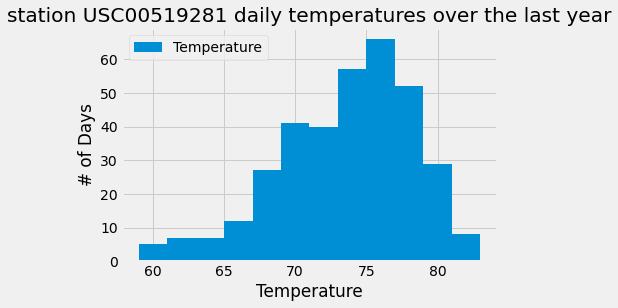

In [106]:
# Put in a dataframe

annual_temperature_df.plot.hist(bins=12)
plt.title("station USC00519281 daily temperatures over the last year")
plt.xlabel("Temperature")
plt.ylabel("# of Days")

# Close session

In [ ]:
# Close Session
session.close()